# The Binary Tree Lottery Problem

The Binary Tree Lottery is a game where $k$ different nodes are randomly selected without replacement from a perfect binary tree of height $h$. You win the lottery if the $k$ selected nodes belong to the same level of the tree. See **Animation 1**.


<img src="img/animation1.gif" />

**Animation 1:** binary tree lottery for $h=3$ and $k=2$. Winner nodes are displayed *green*, and loser nodes are displayed *red*.
<br><br>
The problem consists in finding the probability of winning the binary tree lottery as a function of $h$ and $k$.

# Background

The Binary Tree Lottery is an interesting and challenging problem that combines elements of probability and factorial growth. The game consists of randomly selecting $k$ nodes without replacement from a perfect binary tree of height $h$ and winning if the selected nodes belong to the same level of the tree. The probability of winning is not immediately clear for larger values of $k$ and $h$, as the number of possible ways of winning and losing both increase at a factorial rate with the height of the tree. This makes the Binary Tree Lottery a fascinating and thought-provoking puzzle for anyone interested in probability and mathematics.

# Statement

Consider a perfect binary tree $T$ of height $h$ with levels $T_0, T_1, \dots, T_h$ and a random set $S_{k} = \{n_1, n_2, \dots, n_k | n_i \neq n_j \forall i \neq j \}$ of $k$ nodes from $T$. Find $P(A)$, the probability that $n_j \in T_i \forall j$, as a function of $h$ and $k$

$$
\begin{split}
&f : \mathbb{N} \times \mathbb{N} \to \mathbb{R}\\
&f(h, k) = P(A)
\end{split}
$$

given that the selection of $S_k$ follows a uniform distribution, i.e., $P(S_k) = \frac{1}{N_s}$, where $N_s$ is the number of possible different sets $S_k$.

# Solution

Consider a function $w(h, k)$ that returns the number of sets of $S_k$ such that for some value of $i \in \{0, 1, \dots, h\}$, $n_j \in T_i \forall j \in \{1, 2, \dots, k\}$, i.e., the number of different possible ways of winning the *Binary Lottery Game*; and a function $g(h, k)$ that returns the number of all possible sets $S_k$, either they win or lose. $f(h,k)$ can now be defined as

$$
f(h, k) = \frac{w(h, k)}{g(h, k)}
$$


## Deriving the formula for $g(h, k)$

We defined $g(h, k)$ to be the function that returns the number of all possible sets $S_k$, that is

$$
g(h, k) = N_s
$$

We can think of $g(h, k)$ as the number of ways to choose $k$ nodes from the set of $2^{h+1}-1$ nodes of $T$, without regard to the order in which they are chosen. In other words, $g(h, k)$ is the *k*-combination of the set of nodes of $T$

$$
\begin{split}
g(h, k) = {2^{h+1}-1 \choose k} = \frac{(2^{h+1}-1)!}{k!(2^{h+1}-1-k)!}\
\end{split}
$$

## Deriving the formula for $w(h, k)$

Consider a function $w_i(k)$ that returns the number of sets of $S_k$ such that  $n_j \in T_i \forall j \in \{1, 2, \dots, k\}$, i.e., the number of different possible ways of winning the *Binary Lottery Game* and the $k$ nodes belonging to the level $T_i$. Then

$$
w(h, k) = \sum_{i=0}^{h}w_i(k)
$$

If the number of nodes from the level $T_i$ is less than $k$, then $w_i(k)$ is equal to zero

$$
2^i < k \implies w_i(k) = 0
$$

By clearing $i$

$$
\begin{split}
2^i &< k\\
log_2(2^i) &< log_2(k)\\
i &< \lceil log_2(k) \rceil \text{ (as } i \in \mathbb{N}\text{)}\\
\therefore i < \lceil log_2(k) \rceil &\implies w_i(k) = 0
\end{split}
$$

Otherwise, if the number of nodes from the level $T_i$ is greater than $k$, $w_i(k)$ is the number of ways to choose $k$ nodes from the tree level $T_i$, i.e., the *k*-combination of the set of nodes of $T_i$. 

$$
\begin{equation*}
w_i(k)=
    \begin{cases}
        {2^i \choose k} & \text{if } i \ge \lceil log_2(k) \rceil\\
        0 & \text{if } i < \lceil log_2(k) \rceil
    \end{cases}
\end{equation*}
$$

and

$$
\begin{split}
w(h, k) &= \sum_{i=0}^{h}w_i(k)\\
&= \sum_{i=0}^{\lceil log_2(k) \rceil - 1}w_i(k) + \sum_{i=\lceil log_2(k) \rceil}^{h}w_i(k)\\
&= \sum_{i=\lceil log_2(k) \rceil}^{h} {2^i \choose k}
\end{split}
$$

**Note:** since ${n\choose k} = 0$ for $k > n$, we can also define $w(h, k)$ as

$$
w(h, k) = \sum_{i=0}^{h} {2^i \choose k}
$$

However, it is worth noting that this alternative formula requires more computational time to execute.

## Solving for $f(h, k)$

$$
\begin{split}
f(h, k) &= \frac{w(h, k)}{g(h, k)}\\
&= \frac{\sum_{i=\lceil log_2(k) \rceil}^{h}\frac{2^i!}{k!(2^i - k)!}}{\frac{(2^{h+1}-1)!}{k!(2^{h+1}-1 - k)!}}\\
&= \frac{\frac{1}{k!}\sum_{i=\lceil log_2(k) \rceil}^{h}\frac{2^i!}{(2^i - k)!}}{\frac{1}{k!}\frac{(2^{h+1}-1)!}{(2^{h+1}-1 - k)!}}\\
&= \frac{\sum_{i=\lceil log_2(k) \rceil}^{h}\frac{2^i!}{(2^i - k)!}}{\frac{(2^{h+1}-1)!}{(2^{h+1}-1 - k)!}}\\\\
\therefore f(h, k) &= \frac{\sum_{i=\lceil log_2(k) \rceil}^{h} {_{2^i}C_{k}}}{{_{2^{h+1}-1}C_{k}}} = \frac{\sum_{i=\lceil log_2(k) \rceil}^{h} {_{2^i}P_{k}}}{{_{2^{h+1}-1}P_{k}}}
\end{split}
$$

In summary, we have demonstrated that $f(h, k)$, the probability of winning the Binary Tree Lottery, is directly proportional to the sum of the node permutations across each level of the binary tree and inversely proportional to the permutation of all the nodes of the tree.

# Monte Carlo Simulation

To verify the accuracy of the formula for the probability of winning the Binary Lottery Game $f(h, k)$, we conducted a Monte Carlo simulation. The simulation consists of playing the game multiple times and recording the number of wins, which can then be used to estimate the probability of winning

$$
P(A) \approx \frac{n_w}{n_i}
$$

where $n_w$ is the number of wins and $n_i$ is the number of iterations (i.e., the number of games played). This approximation becomes more precise for a larger number of iterations

$$
P(A) = \lim_{n_i \to +\infty} \frac{n_w}{n_i}
$$

## Experiments

To run the simulation and make the experiments, we implemented some functions in Python:

- *montecarlo_simulation(h, k, iteration_list)*
  - *h*: height of the tree.
  - *k*: number of nodes selected in each round.
  - *h*: list of positive integers containing the iterations to be stored in the simulation. 
  - Returns a *Simulation* object, i.e., a dictionary where the keys represent the iteration number and the values represent the estimated probability of winning the binary lottery game $P(A)$. 
  - 
- *f(h, k)*
  - *h*: height of the tree.
  - *k*: number of nodes selected.
  - Returns the analytic result of $P(A)$ by evaluating $f(h, k) = \frac{w(h, k)}{g(h, k)}$.

- *montecarlo_scatter_plot(simulation, smallest_iteration, analytic_result)*
  - *simulation*: Monte Carlo simulation.
  - *smallest_iteration*: smallest iteration plotted. This prevents outliers to be plotted.
  - *analytic_result*: analytic result of $P(A)$.

- *montecarlo_table(simulation, iteration_list)*:
  - *simulation*: Monte Carlo simulation.
  - *iteration_list*: list of iterations to show on the table. The iterations in *iteration_list* must also be in *simulation*.

In [1]:
from src import f, montecarlo_simulation, montecarlo_scatter_plot, montecarlo_table

### Experiment 1

The first experiment consists in running the simulation with a binary tree of height $6$ ($63$ nodes), $k=3$, and $1{,}000{,}000$ iterations. $P(A)$ is recorded at iterations $\{1{,}000; 10{,}000; 20{,}000; 30{,}000; \dots; 10{,}000{,}000\}$.

In [6]:
h = 6
k = 3
iteration_list = [1000] + [i * 10_000 for i in range(1, 501)] # [1_000, 10_000, 20_000, ..., 5_000_000]
simulation = montecarlo_simulation(h, k, iteration_list)
analytic_result = f(h, k)

print(f"P(A) = {analytic_result}")

P(A) = 0.1417142857142857142857142857


The scatter plots below show how the estimated probability $\frac{w}{i}$ tends to the analytic result $f(h, k)$ for larger number of iterations. The first plot has a smallest iteration of $1$ (i.e., all iterations recorded by the simulation are plotted) and the second plot has a smallest iteration of $100{,}000$.

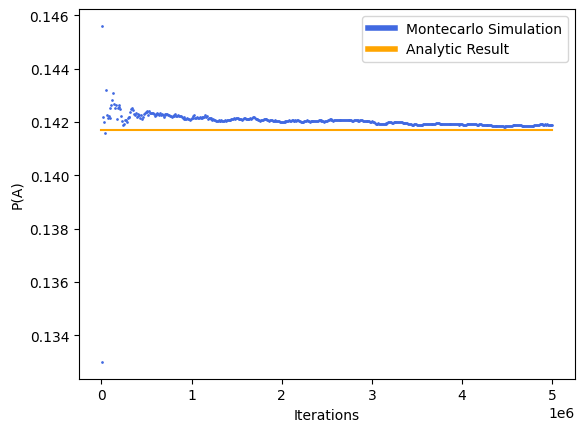

In [10]:
smallest_iteration = 1
montecarlo_scatter_plot(simulation, smallest_iteration, analytic_result)

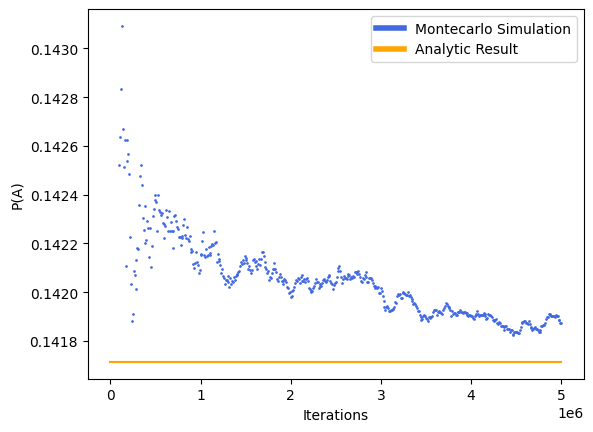

In [11]:
smallest_iteration = 100_000
montecarlo_scatter_plot(simulation, smallest_iteration, analytic_result)

The following table shows the estimated value of $P(A)$ for the set of iterations $\{1{,}000, 10{,}000, 100{,}000, 1{,}000{,}000, 5{,}000{,}000\}$.

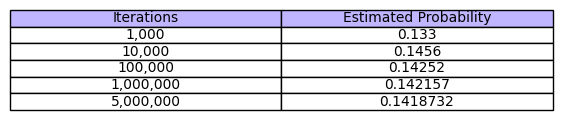

In [14]:
montecarlo_table(simulation, [1_000, 10_000, 100_000, 1_000_000, 5_000_000])

### Experiment 2

The second experiment consists in running the simulation with a binary tree of height $5$ ($31$ nodes), $k=10$, and $1{,}000{,}000$ iterations. As in *Experiment 1*, $P(A)$ is recorded at iterations $\{1{,}000; 10{,}000; 20{,}000; 30{,}000; \dots; 10{,}000{,}000\}$.

In [15]:
h = 5
k = 10
iteration_list = [1000] + [i * 10_000 for i in range(1, 501)] # [1_000, 10_000, 20_000, ..., 5_000_000]
simulation = montecarlo_simulation(h, k, iteration_list)
analytic_result = f(h, k)

print(f"P(A) = {analytic_result}")

P(A) = 0.0005048314460544265872226226011


The scatter plots below show how the estimated probability $\frac{w}{i}$ tends to the analytic result $f(h, k)$ for larger number of iterations. The first plot has a smallest iteration of $1$ (i.e., all iterations recorded by the simulation are plotted) and the second plot has a smallest iteration of $100{,}000$.

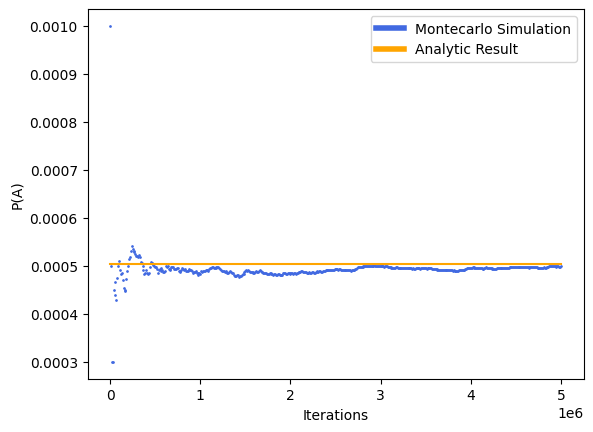

In [24]:
smallest_iteration = 1
montecarlo_scatter_plot(simulation, smallest_iteration, analytic_result)

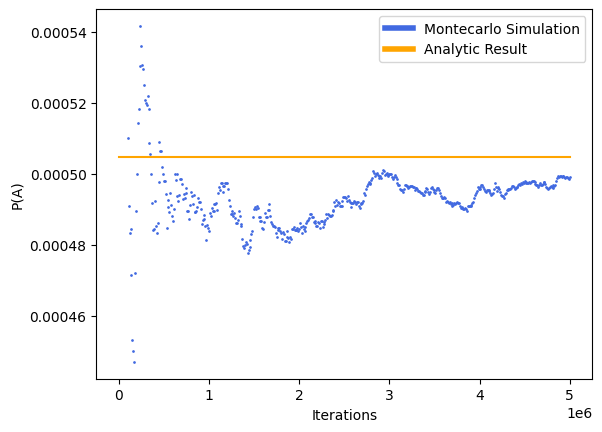

In [25]:
smallest_iteration = 100_000
montecarlo_scatter_plot(simulation, smallest_iteration, analytic_result)

The following table shows the estimated value of $P(A)$ for the set of iterations $\{1{,}000, 10{,}000, 100{,}000, 1{,}000{,}000, 5{,}000{,}000\}$.

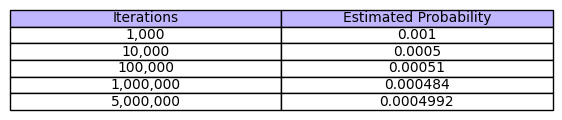

In [26]:
montecarlo_table(simulation, [1_000, 10_000, 100_000, 1_000_000, 5_000_000])